In [283]:
import numpy as np
from sklearn import svm
from sklearn.svm import SVC
import sklearn.model_selection
import numpy.random as rd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import warnings, pandas as pd,numpy as np, time, math, configparser,random
import pandas as pd
import numpy as np
import random
import csv
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import KFold
import time
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [284]:
## 1. GWO optimization algorithm
def sanitized_gwo(X_train,X_test,y_train,y_test,SearchAgents_no,T,dim,lb,ub):
    Alpha_position=[0,0] # Initialize the position of Alpha Wolf
    Beta_position=[0,0]
    Delta_position=[0,0]  

    Alpha_score = float("inf") # Initialize the value of Alpha Wolf's objective function 
    Beta_score = float("inf")
    Delta_score = float("inf")
 
    Positions = np.dot(rd.rand(SearchAgents_no,dim),(ub-lb))+lb # initialize the first search position
    
    Convergence_curve=np.zeros((1,T))# initialization fusion curve

    iterations = []
    accuracy = []

    # Main Loop
    t = 0 
    while t < T:
        
        # Iterate over each wolf
        for i in range(0,(Positions.shape[0])):
            #If the search position exceeds the search space, you need to return to the search space 
            for j in range(0,(Positions.shape[1])): 
                Flag4ub=Positions[i,j]>ub
                Flag4lb=Positions[i,j]<lb
                #If the wolf's position is between the maximum and minimum, the position does not need to be adjusted,
                #if it exceeds the maximum, the maximum returns to the maximum value boundary

                if Flag4ub:                   
                    Positions[i,j] = ub
                if Flag4lb:                   
                    Positions[i,j] = lb
            '''SVM MODEL TRAINING - FOR CLASSIFICATION PROBLEM DATASET''' 
            rbf_svm = svm.SVC(kernel = 'rbf', C = Positions[i][0], gamma = Positions[i][1]).fit(X_train, y_train)  #svm
            cv_accuracies = cross_val_score(rbf_svm,X_test,y_test,cv =3,scoring = 'accuracy')
            
            '''SVR MODEL TRAINING - FOR REGRESSION PROBLEM DATASET'''
            #rbf_regressor = svm.SVR(kernel = 'rbf', C = Positions[i][0], gamma = Positions[i][1]).fit(X_train, y_train)  #svm        
            #cv_accuracies = cross_val_score(rbf_regressor,X_test,y_test,cv =3,scoring = 'neg_mean_squared_error') # Taking negated value of MSE
            
            
            #To minimize the error rate
            accuracies = cv_accuracies.mean()            
            fitness_value = (1 - accuracies)*100
            if fitness_value<Alpha_score: # If the objective function value is less than the objective function value of Alpha Wolf
                Alpha_score=fitness_value # Then update the target function value of Alpha Wolf to the optimal target function value
                Alpha_position=Positions[i] # At the same time update the position of the Alpha wolf to the optimal position
            if fitness_value>Alpha_score and fitness_value<Beta_score:  # If the objective function value is between the objective function value of Alpha Wolf and Beta Wolf
                Beta_score=fitness_value # Then update the target function value of Beta Wolf to the optimal target function value
                Beta_position=Positions[i]
            if fitness_value>Alpha_score and fitness_value>Beta_score and fitness_value<Delta_score: #If the target function value is between the target function value of Beta Wolf and Delta Wolf
                Delta_score=fitness_value  # Then update the target function value of Delta Wolf to the optimal target function value
                Delta_position=Positions[i]


        a=2-t*(2/T)
        
        # Iterate over each wolf
        for i in range(0,(Positions.shape[0])):
            #Traverse through each dimension
            for j in range(0,(Positions.shape[1])): 
                #Surround prey, location update                 
                r1=rd.random(1)#Generate a random number between 0 ~ 1
                r2=rd.random(1)               
                A1=2*a*r1-a # calculation factor A
                #C1=2*r2 # calculation factor C
                C1 = 0.5 + (0.5*math.exp(-j/500)) + (1.4*(math.sin(j)/30)) # Time varying Acceleration constant 

                #Alphawolf location update
                
                D_alpha=abs(C1*Alpha_position[j]-Positions[i,j])
                X1=Alpha_position[j]-A1*D_alpha
                       
                r1=rd.random(1)
                r2=rd.random(1)

                A2=2*a*r1-a
                #C2=2*r2
                C2  = 1 + (1.4*(1 - math.exp(-j/500)) ) + (1.4*(math.sin(j)/30)) #Difference Mean based Perturbation time varying parameter

                # Beta wolf location update
                D_beta=abs(C2*Beta_position[j]-Positions[i,j])
                X2=Beta_position[j]-A2*D_beta
                r1=rd.random(1)
                r2=rd.random(1)

                A3=2*a*r1-a
                #C3=2*r2
                C3=(1/(1+ math.exp(-0.0001*j/T) )) + ((0.5 - 2.5) * ((j/T) **2)) #sigmoid-based acceleration coefficient

                # Delta Wolf Location Update
                D_delta=abs(C3*Delta_position[j]-Positions[i,j])
                X3=Delta_position[j]-A3*D_delta

                # Location update
                Positions[i,j]=(X1+X2+X3)/3

        
        t = t + 1
        iterations.append(t)
        accuracy.append((100-Alpha_score)/100)
        print('----------------Count of iterations----------------' + str(t))
        print(Positions)
        print('C and gamma:' + str(Alpha_position))
        print('accuracy:' + str((100-Alpha_score)/100))

    best_C=Alpha_position[0]
    best_gamma=Alpha_position[1]

    return best_C,best_gamma,iterations,accuracy
    #plot(x axis = gamma, y axis = C)
    #plotting (x axis = gamma, y axis = C)
    #plot(Alpha_position)
# Plot Convergence Curve
'''
def plot(iterations,accuracy):
    plt.plot(iterations,accuracy)
    plt.xlabel('Count of iterations',size = 20)
    plt.ylabel('Accuracy',size = 20)
    plt.title('Sanitized GWO-SVM parameter optimization (SGWO_SVM)')
    plt.show()
'''
# Plot Scatter GWO
def plot(best_C,best_gamma):
    plt.plot(best_C,best_gamma)
    colors = (0,0,0)
    plt.scatter(best_C, best_gamma, c = colors, alpha = 0.1)
    plt.xlabel('C',size = 20)
    plt.ylabel('Gamma',size = 20)
    plt.axis([0,9,0,10])
    plt.gca().set_aspect('equal', adjustable='box')
    plt.title('Sanitized GWO-SVM parameter optimization (SGWO_SVM)')
    plt.show()

In [285]:
if __name__ == '__main__':
    print('----------------1. Load data-------------------')
    url = "Polish6yeartrain.csv"
    colnames = ['x1', 'x2', 'x3','y']
    data = pd.read_csv(url,header = None, names = colnames)

----------------1. Load data-------------------


In [286]:
data.shape

(43401, 4)

In [287]:
data['y'].value_counts()

0    41310
1     2091
Name: y, dtype: int64

In [288]:
data['y'].value_counts()/np.float(len(data))

0    0.951821
1    0.048179
Name: y, dtype: float64

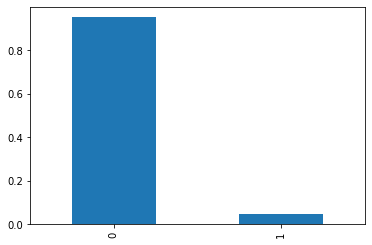

In [289]:
(data['y'].value_counts()/np.float(len(data))).plot.bar()

In [290]:
# declare feature vector and target variable

X = data.drop(['y'], axis=1)
y = data['y']

In [291]:
# import resample module 

from sklearn.utils import resample

In [292]:
# separate the minority and majority classes
df_majority = data[data['y']==0]
df_minority = data[data['y']==1]

In [293]:
# oversample minority class

df_minority_oversampled = resample(df_minority, replace=True, n_samples=43400, random_state=0)

In [294]:
# combine majority class with oversampled minority class

df_oversampled = pd.concat([df_majority, df_minority_oversampled])

In [295]:
# display new class value counts

df_oversampled['y'].value_counts()

1    43400
0    41310
Name: y, dtype: int64

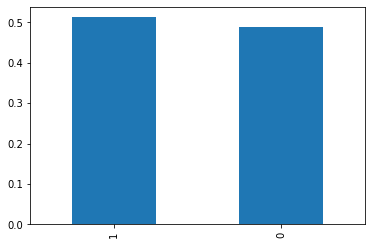

In [296]:
# view the distribution of percentages within the Class column


(df_oversampled['y'].value_counts()/np.float(len(df_oversampled))).plot.bar()

In [297]:
# declare feature vector and target variable
X1 = df_oversampled.drop(['y'], axis=1)
X1 =(X1-X1.mean())/X1.std()
y1 = df_oversampled['y']
X_train, X_test, y_train, y_test = train_test_split(X1, y1,test_size = 0.2, random_state=42)

In [298]:
#X = data.drop('y', axis = 1)
#X =(X-X.mean())/X.std()
#y = data['y']
#X_train,X_test,y_train,y_test= train_test_split(X, y, test_size = 0.2, random_state = 0)

In [299]:
print('----------------2. Parameter setting------------')
SearchAgents_no=10 #Number of Wolfs
T=10 # maximum number of iterations
dim=2 #Need to optimize two variables - Cost and Gamma
lb=0.01 #lower bound Parameter
ub=10 #upper bound Parameter

----------------2. Parameter setting------------


In [300]:
print('----------------3.LARGE-----------------')
best_C,best_gamma,iterations,accuracy = sanitized_gwo(X_train,X_test,y_train,y_test,SearchAgents_no,T,dim,lb,ub)

print('----------------4. The result shows-----------------')
print("The best C is " + str(best_C))
print("The best gamma is " + str(best_gamma))
    #plot(iterations,accuracy)
    #plot(Alpha_position)
#plot(best_C,best_gamma)

----------------3.LARGE-----------------
----------------Count of iterations----------------1
[[ 4.69971417  2.21553137]
 [ 2.87437521  3.70551466]
 [ 3.73597947  6.5384715 ]
 [ 1.99173445  7.00709816]
 [ 7.14313756  4.2366694 ]
 [ 4.28335793  4.1244744 ]
 [ 4.16097759 11.1143127 ]
 [ 7.83658817 10.85312075]
 [ 8.48246708 11.3444062 ]
 [ 6.42092214  6.3285644 ]]
C and gamma:[6.42092214 6.3285644 ]
accuracy:0.659603357210569
----------------Count of iterations----------------2
[[ 7.09043533  6.94441752]
 [ 7.84777429 16.42314577]
 [ 5.46109815  8.18491345]
 [ 7.89243532  9.47596519]
 [ 6.38908197  6.52240733]
 [ 6.03996888  9.58369793]
 [ 5.63993087  8.84968103]
 [ 8.64850207  4.75949502]
 [ 7.56450479 11.55173151]
 [ 7.81617073  9.6614939 ]]
C and gamma:[ 7.56450479 11.55173151]
accuracy:0.660252617273781
----------------Count of iterations----------------3
[[ 8.23224239  8.78856704]
 [ 6.64694543 11.79772444]
 [ 6.10627031  8.54345718]
 [ 6.25468618  9.99282533]
 [ 6.7953609   9.84215

In [301]:
#Apply Optimal Parameters to SVR
svclassifier= SVC(kernel='rbf', C = best_C,gamma=best_gamma )
svclassifier.fit(X_train,y_train)
y_pred = svclassifier.predict(X_test)
y_train_pred = svclassifier.predict(X_train)
# APPLYING K-FOLD CROSS VALIDATION on RF model
accuracies = cross_val_score(svclassifier, X = X_train, y = y_train, cv = 10)
accuracy_mean= accuracies.mean()
accuracies.std()*100

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2=r2_score(y_test, y_pred)
nrmse=rmse/(y_test.max() - y_test.min())

In [302]:
print("SVC RESULTS - C AND GAMMA PARAMETERS OPTIMIZED BY GRAY WOLF OPTIMIZATION")
print("RMSE =", rmse)
print("MSE =", mse)
print("Normalized RMSE=",nrmse)
print("R Square =",r2)
print("K-fold accuracy mean",accuracy_mean)
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix,classification_report
import time
#Performance Metrics
#print("Training Findings")
#print("Accuracy:",accuracy_score(y_train, y_pred))  
#print("Confusion Matrix:",confusion_matrix(y_true, y_pred))
#print("Testing Findings")
#print("Test Accuracy:",accuracy_score(y_test, y_pred)) 
#print("Confusion Matrix:",confusion_matrix(y_test, y_pred))
#Time
start = time.time()
#model.fit(X, y)
svclassifier.fit(X_train, y_train)
#svclassifier.fit(X_test, y_test)
stop = time.time()
print(f"Training time: {stop - start}s")
#print(f"Test time: {stop - start}s")
#plot(best_C,best_gamma)

SVC RESULTS - C AND GAMMA PARAMETERS OPTIMIZED BY GRAY WOLF OPTIMIZATION
RMSE = 0.5831822381062712
MSE = 0.3401015228426396
Normalized RMSE= 0.5831822381062712
R Square = -0.36111263554545103
K-fold accuracy mean 0.6627760047309124
Training time: 148.19912195205688s


In [303]:
#Time
start = time.time()
#model.fit(X, y)
#svclassifier.fit(X_train, y_train)
svclassifier.fit(X_test, y_test)
stop = time.time()
#print(f"Training time: {stop - start}s")
print(f"Test time: {stop - start}s")
#plot(best_C,best_gamma)

Test time: 9.577940464019775s


In [304]:
#Performance Metrics
print("Training Findings")
print("Accuracy:",accuracy_score(y_train, y_train_pred))  
print("Confusion Matrix:",confusion_matrix(y_train, y_train_pred))
print("Testing Findings")
print("Test Accuracy:",accuracy_score(y_test, y_pred)) 
print("Confusion Matrix:",confusion_matrix(y_test, y_pred))

Training Findings
Accuracy: 0.6629235037185692
Confusion Matrix: [[21292 11740]
 [11103 23633]]
Testing Findings
Test Accuracy: 0.6598984771573604
Confusion Matrix: [[5328 2950]
 [2812 5852]]
